In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras import datasets
import numpy as np
import matplotlib.pyplot as plt	


In [22]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print (X_train.shape)
print (X_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [23]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


In [24]:
classes = ["airplane","automobile","bird","cat",
           "deer","dog","frog","horse","ship","truck"]
print (classes)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [25]:
y_train = y_train.reshape(-1,)
print (y_train)


[6 9 9 ... 9 1 1]


In [26]:
y_test = y_test.reshape(-1,)
print (y_test)


[3 8 8 ... 5 1 7]


In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [28]:
print (X_train.shape)

(50000, 32, 32, 3)


In [29]:

cnn = models.Sequential([
    layers.Input(shape=(32,32,3)) ,
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # ANN components
    layers.Flatten(),
    layers.Dense(3000, activation='relu'), 
    layers.Dropout (0.5),
    layers.Dense(1000, activation='relu'),
    layers.Dropout (0.5),
    layers.Dense(10, activation= 'softmax')
])



In [30]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [31]:

cnn.fit(x=X_train,      y=y_train, 
          epochs=15,  validation_data=(X_test, y_test), verbose=1   )



Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.4726 - loss: 1.4508 - val_accuracy: 0.5928 - val_loss: 1.1603
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6154 - loss: 1.0939 - val_accuracy: 0.6713 - val_loss: 0.9492
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6788 - loss: 0.9162 - val_accuracy: 0.6893 - val_loss: 0.9102
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7225 - loss: 0.7899 - val_accuracy: 0.6829 - val_loss: 0.9316
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.7656 - loss: 0.6695 - val_accuracy: 0.7107 - val_loss: 0.8467
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 333s 181ms/step - accuracy: 0.7980 - loss: 0.5716 - val_accuracy: 0.7096 - val_loss: 0.8826
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 316s 177ms/step - accuracy: 0.8300 - loss: 0.4858 - val_accuracy: 0.7115 - val_loss: 0.8900
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 324s 178ms/step - accuracy: 0

In [32]:
print  (cnn.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3000)                │       6,915,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,836,208 (113.82 MB)

 Trainable params: 9,945,402 (37.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,890,806 (75.88 MB)

None


In [33]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7089 - loss: 1.1809


[1.1808898448944092, 0.708899974822998]

In [34]:
y_pred = cnn.predict (X_test)
print (y_pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[2.6226806e-02 2.0511937e-03 6.3667215e-02 ... 4.1242219e-03
  7.1049127e-04 7.8244749e-03]
 [2.4071245e-02 2.9668647e-01 3.0443491e-06 ... 5.9632413e-08
  6.7740369e-01 1.8276614e-03]
 [6.2390596e-02 2.2160115e-03 9.6460816e-04 ... 1.1284734e-04
  9.2625755e-01 7.2372807e-03]
 ...
 [2.2565363e-09 6.6973573e-11 9.7113964e-04 ... 2.6326155e-04
  3.8365157e-12 3.7091836e-09]
 [1.4034276e-04 9.9979967e-01 4.5246111e-06 ... 1.3653242e-07
  4.8873012e-06 1.8345940e-05]
 [1.4348902e-22 3.2612256e-21 4.4569422e-19 ... 1.0000000e+00
  1.6788827e-28 4.1110012e-21]]


In [35]:
y_classes = [np.argmax(element) for element in y_pred]
print (y_classes)


[np.int64(5), np.int64(8), np.int64(8), np.int64(0), np.int64(6), np.int64(6), np.int64(1), np.int64(6), np.int64(3), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(7), np.int64(9), np.int64(8), np.int64(5), np.int64(7), np.int64(8), np.int64(6), np.int64(2), np.int64(0), np.int64(2), np.int64(9), np.int64(4), np.int64(2), np.int64(4), np.int64(0), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(6), np.int64(9), np.int64(3), np.int64(7), np.int64(9), np.int64(9), np.int64(5), np.int64(4), np.int64(6), np.int64(5), np.int64(6), np.int64(0), np.int64(9), np.int64(5), np.int64(3), np.int64(7), np.int64(3), np.int64(9), np.int64(8), np.int64(6), np.int64(3), np.int64(8), np.int64(8), np.int64(7), np.int64(1), np.int64(5), np.int64(0), np.int64(7), np.int64(5), np.int64(6), np.int64(9), np.int64(6), np.int64(6), np.int64(8), np.int64(2), np.int64(5), np.int64(7), np.int64(2), np.int64(6), np.int64(8), np.int64(8), np.int64(9), np.int64(2), np.int64(2)

In [36]:
print (y_test)

[3 8 8 ... 5 1 7]


Prediction
ship

Actual


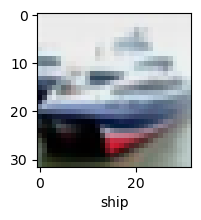

In [37]:

print ("Prediction")
print (classes[y_classes[1]])  # This prediction 
print ("\nActual")
plot_sample(X_test, y_test,1) # This is actual


Prediction
bird

Actual


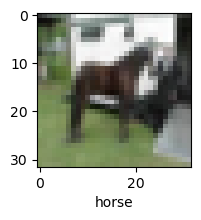

In [38]:

print ("Prediction")
print (classes[y_classes[20]])  # This prediction 
print ("\nActual")
plot_sample(X_test, y_test,20) # This is actual	




In [39]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred =cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print ('Accuracy')
print (accuracy_score (y_test, y_pred_classes))
print ()
print("Classification Report: \n", classification_report(y_test, y_pred_classes, zero_division = 0))
cm = confusion_matrix(y_test, y_pred_classes)
print (cm)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy
0.7089

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.81      0.87      0.84      1000
           2       0.69      0.53      0.60      1000
           3       0.53      0.50      0.51      1000
           4       0.64      0.66      0.65      1000
           5       0.55      0.66      0.60      1000
           6       0.76      0.78      0.77      1000
           7       0.81      0.70      0.75      1000
           8       0.80      0.83      0.82      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

[[757  18  30  18  20   6  11   9  88  43]
 [  7 867   2   7   3   7  11   1  17  78]
 [ 69  15 534  86  96  84  52  32  16  16]
 [ 23   8  56 501  67 209  72

In [40]:

import pandas as pd
pd.concat ([pd.DataFrame(y_test), pd.DataFrame(y_classes)],axis =1).head(50)


,0,0
0,3,5
1,8,8
2,8,8
3,0,0
4,6,6
5,6,6
6,1,1
7,6,6
8,3,3
9,1,1
